# Ising model for spin chain with PBCs
Consider the Hamiltonian:

$H=-h\sum\limits_{i=1}^N\sigma_i^x-J_z\sum\limits_{i=1}^N\sigma_i^z\sigma_{i+1}^z$
, where $N=20$, $h=J_z=1$.

The energy of the ground state is: 

$E_0=-25.490989686360003$

# SGD optimmizer

## Preamble





In [1]:
%tensorflow_version 2.x

# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU


def check_mem():
    GPUs = GPU.getGPUs()
    # XXX: only one GPU on Colab and isn’t guaranteed
    gpu = GPUs[0]

    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), 
          " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
    
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, 
                                                                                                gpu.memoryUsed, 
                                                                                                gpu.memoryUtil*100, 
                                                                                                gpu.memoryTotal))

print(end="\n\n")
check_mem()

from google.colab import drive
drive.mount('/content/drive')

current_location = '/content/drive/My Drive/Coursework program/Examples/ising_1d_symmetric'

assert os.path.exists(current_location), current_location + ' is not exists'

os.chdir(current_location)
print('Current location:', current_location)

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=c4f7743f40ce165177db5030db6ca3db50873adbfa01a60781acb6e1f4c2c49d
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil


Gen RAM Free: 12.8 GB  | Proc size: 159.4 MB
GPU RAM Free: 7611MB | Used: 0MB | Util   0% | Total 7611MB
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Current location: /content/drive/My Drive/Coursework program/Examples/isin

## Code to training

Considering the operator: {'Ising1dSymmetric': {'Jz': 1.0, 'hfield': 1.0, 'pbc': 1}}
Using the sampler: {'MetropolisHastings': {'nflips': 1, 'nmoves': 200000, 'nsweeps': 10000, 'sweepfactor': 1.0, 'thermfactor': 0.1}}
Using the optimizer: {'SGD': {'learning_rate': 0.01, 'schedule_multiplier': 'fixed', 'SR': {'lambd0': 100.0, 'b': 0.9, 'lambdMin': 0.0001}, 'L2': {'L2_factor': 0.0001}}}


Start training...
{'Iteration': 1, 'sampler results': {'acceptance': 0.998535, 'energy error': 0.04757832629554465, 'energy mean': -20.07241315899894, 'nacceptance': 199707, 'taucorr': 0.5650729013963119}, 'Time left': '263 min 21 s'}
{'Iteration': 2, 'sampler results': {'acceptance': 0.9843, 'energy error': 0.053679037337332355, 'energy mean': -20.01479473137755, 'nacceptance': 196860, 'taucorr': 0.7103550200355695}, 'Time left': '61 min 5 s'}
{'Iteration': 3, 'sampler results': {'acceptance': 0.98301, 'energy error': 0.03842265909162246, 'energy mean': -20.132619759963063, 'nacceptance': 196602, 'tauc

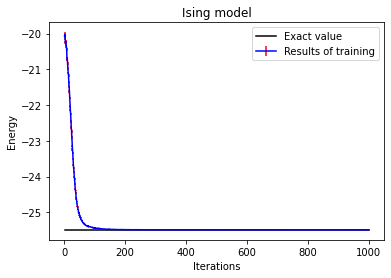

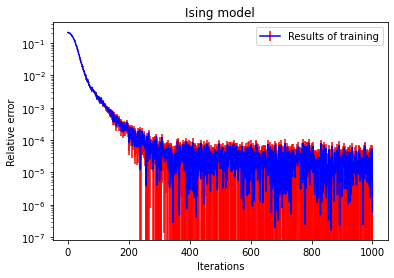

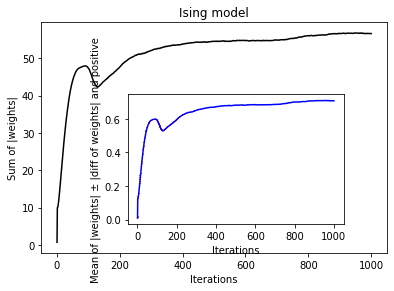

In [2]:
os.chdir(os.path.dirname(os.path.dirname(current_location) ) )
import ground
import ground.logging.plot as plot
os.chdir(current_location)

# enter the seed for the pseudo-random generator for constancy of results
seed = 3141592654
ground.randomizer.seed(seed)

# create a Neural-network Quantum States (NQS)
nqs = ground.machine.Nqs(n_visible=20, alpha=2)

# create a operator
ising_1d_symmetric = ground.operator.Ising1dSymmetric(nqs=nqs)

# create a sampler
metropolis_hastings = ground.sampler.MetropolisHastings(
    nqs=nqs, operator=ising_1d_symmetric
)

# create a optimizer using stochastic gradient descent with SR method
sgd = ground.optimizer.Sgd()

# the name of data of the results of training and NQS
filename = "sgd"

# use variational Monte-Carlo method
vmc = ground.qmc.Vmc(nqs=nqs, operator=ising_1d_symmetric,
                     sampler=metropolis_hastings,
                     optimizer=sgd, filename=filename)

# start training
vmc.run(num_iter=1000)

# plot training result
plot.energy_mean(num=1, filename=filename, title="Ising model", exact=-25.490989686360003)
plot.relative_error(num=2, filename=filename, title="Ising model", exact=-25.490989686360003)
plot.sgd(num=3, filename=filename, title="Ising model")